# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [2]:
df=pd.read_csv('../input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='O') 


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# check null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Fill null values

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode('s'))


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Create a dummies for categorical data

In [12]:
dummies=pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,0,0


# Pair Plot to see relationship

<Figure size 3600x504 with 0 Axes>

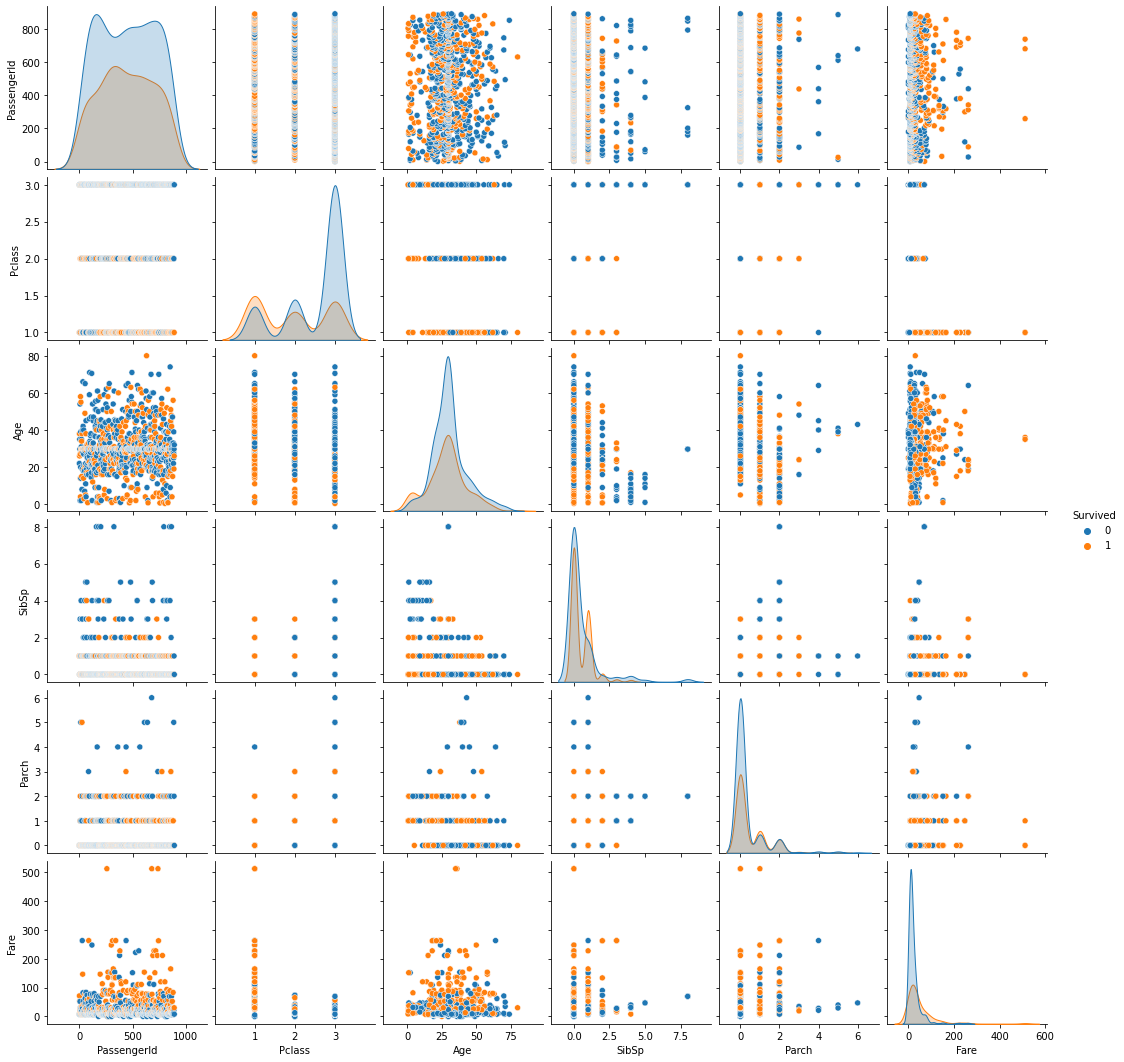

In [13]:
plt.figure(figsize=(50,7))
sns.pairplot(data=df,kind='scatter',hue='Survived')
plt.show()

# Seprate continuous and discrete columns

In [14]:
conti_data=df[['Age']]

# check countplot for continunos and discrete data

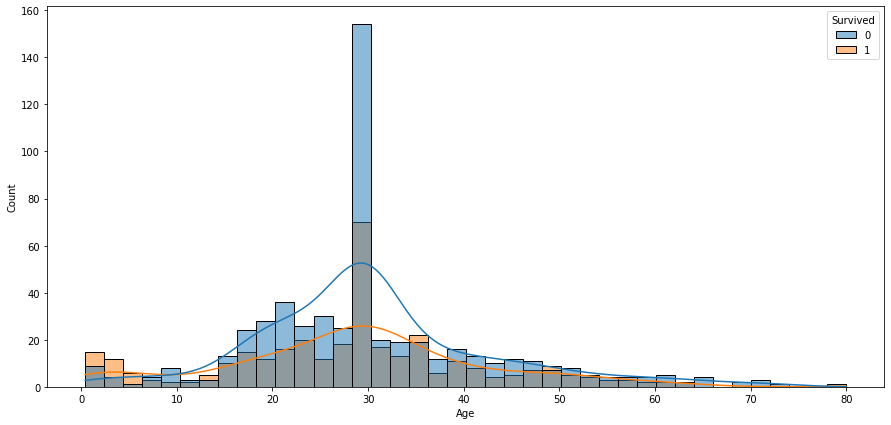

In [15]:
plt.figure(figsize=(15,7))
for i in conti_data:
    
    sns.histplot(data=df,x=i,hue='Survived',kde=True,bins=40)
    plt.show()
     

In [16]:
discrete_data=df[['Survived','Pclass','SibSp','Parch','Sex']]

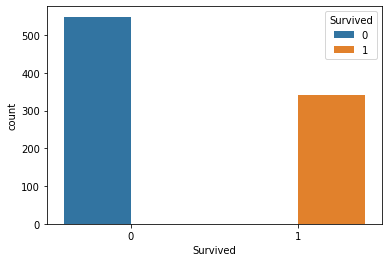

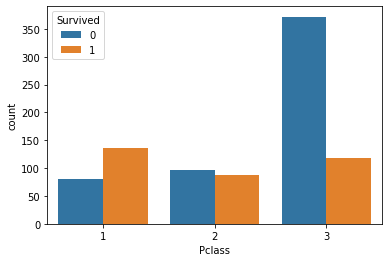

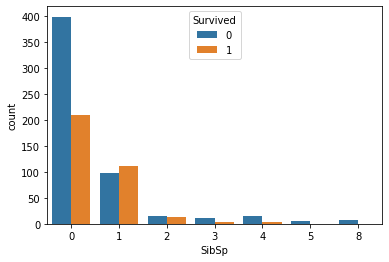

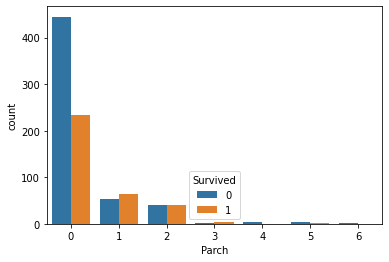

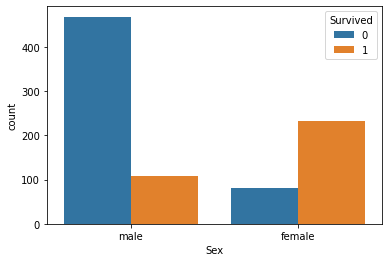

In [17]:
for i in discrete_data:
    sns.countplot(data=df,x=i,hue='Survived')
    plt.show()


# Heatmap for correlation

<AxesSubplot:>

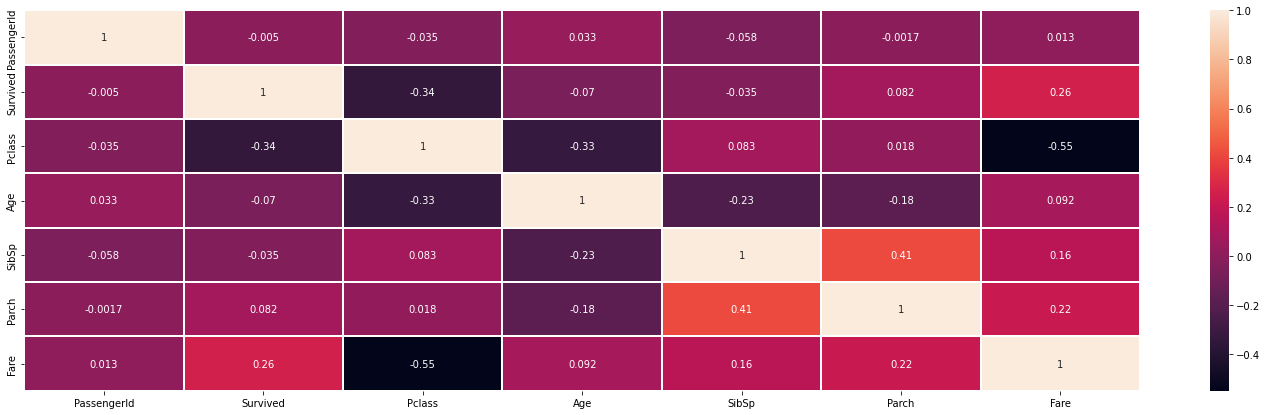

In [18]:
plt.figure(figsize=(25,7))
cor=df.corr()
sns.heatmap(cor,annot=True, linewidths=0.3)

# Seprating source and target columns

In [19]:
x=dummies.drop(['Survived','Name','PassengerId','Ticket','Fare','Cabin'],axis=1)   #Source Column
y=dummies['Survived']   # Target Column
x

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,1,0,1
1,1,38.000000,1,0,0,0,0
2,3,26.000000,0,0,0,0,1
3,1,35.000000,1,0,0,0,1
4,3,35.000000,0,0,1,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,1,0,1
887,1,19.000000,0,0,0,0,1
888,3,29.699118,1,2,0,0,1
889,1,26.000000,0,0,1,0,0


# creating training and testing model

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80)

# Scaling of Dataset

In [21]:
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
x_train=sclar.fit_transform(x_train)
x_test=sclar.fit_transform(x_test)

# logistic regression 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
algo=LogisticRegression()
algo.fit(x_train,y_train)



LogisticRegression()

# Predicting the model 

In [24]:
a=algo.predict(x_train)
b=algo.predict(x_test)


# confussion matrix to check performance of a  model

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,b)
print(cm)

[[98 19]
 [13 49]]


#  Accuracy of Logistic Regression

In [26]:
from sklearn.metrics import accuracy_score
train_score=accuracy_score(a,y_train)
print('accuracy of Logi_Regg train dataset is:',train_score)
test_score=accuracy_score(b,y_test)
print('Accuracy of Logi_Regg test dataset is:',test_score)

accuracy of Logi_Regg train dataset is: 0.8019662921348315
Accuracy of Logi_Regg test dataset is: 0.8212290502793296


# Accuracy  Support Vector Machine

In [27]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
z=svm.score(x_test,y_test)
print('accuracy of SVM:',z)

accuracy of SVM: 0.8212290502793296


# Accuracy of Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
d=dt.score(x_test,y_test)
print('Accuracy of DecisionTree:',d)

Accuracy of DecisionTree: 0.7821229050279329


# Accuracy of Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
e=rfc.score(x_test,y_test)
print('Accuracy of RandomForest:',e)

Accuracy of RandomForest: 0.7821229050279329
